# Integration Tests for Deno Jupyter
This notebook contains a number of tests to ensure that Jupyter is working as expected. You should be able to select "Kernel->Restart and Run All" in Jupyter's notebook UI to run the tests. The first section of tests named "Passing Tests" should pass. The second set of tests "Failing Tests" should fail. When in doubt, refer to the currently committed notebook file to make sure tests pass.

## Passing Tests

### Simple Tests

#### This test should print "hi".
If this doesn't work, everything else will probably fail :)

In [ ]:
console.log("hi")

undefined

hi


#### Top-level await

In [ ]:
let x = await Promise.resolve(42);
console.log("x is", x);

undefined

x is 42


#### TypeScript transpiling
Credit to [typescriptlang.org](https://www.typescriptlang.org/docs/handbook/interfaces.html) for this code

In [3]:
interface SquareConfig {
  color?: string;
  width?: number;
}
 
function createSquare(config: SquareConfig): { color: string; area: number } {
  return {
    color: config.color || "red",
    area: config.width ? config.width * config.width : 20,
  };
}
 
createSquare({ colour: "red", width: 100 });

{ color: "red", area: 10000 }

### Return Values

#### undefined should not return a value

In [4]:
undefined

undefined

#### null should return "null"

In [5]:
null

null

#### boolean should return the boolean

In [6]:
true

true

#### number should return the number

In [7]:
42

42

#### string should return the string

In [8]:
"this is a test of the emergency broadcast system"

"this is a test of the emergency broadcast system"

#### bigint should return the bigint in literal format

In [9]:
31337n

31337n

#### symbol should return a string describing the symbol

In [10]:
Symbol("foo")

Symbol(foo)

#### object should describe the object inspection

In [11]:
{foo: "bar"}

{ foo: "bar" }

In [12]:
Deno

{
  internal: Symbol(Deno.internal),
  resources: [Function: resources],
  close: [Function: op_close],
  metrics: [Function: metrics],
  Process: [class Process],
  run: [Function: run],
  isatty: [Function: isatty],
  writeFileSync: [Function: writeFileSync],
  writeFile: [AsyncFunction: writeFile],
  writeTextFileSync: [Function: writeTextFileSync],
  writeTextFile: [Function: writeTextFile],
  readTextFile: [AsyncFunction: readTextFile],
  readTextFileSync: [Function: readTextFileSync],
  readFile: [AsyncFunction: readFile],
  readFileSync: [Function: readFileSync],
  watchFs: [Function: watchFs],
  chmodSync: [Function: chmodSync],
  chmod: [AsyncFunction: chmod],
  chown: [AsyncFunction: chown],
  chownSync: [Function: chownSync],
  copyFileSync: [Function: copyFileSync],
  cwd: [Function: cwd],
  makeTempDirSync: [Function: makeTempDirSync],
  makeTempDir: [Function: makeTempDir],
  makeTempFileSync: [Function: makeTempFileSync],
  makeTempFile: [Function: makeTempFile],
  memor

#### resolve returned promise

In [13]:
Promise.resolve("it worked!")

Promise { "it worked!" }

In [14]:
Promise.reject(new Error("it failed!"));

Promise {
  <rejected> Error: it failed!
    at <anonymous>:2:16
}

#### object with Symbol("toPng") should return an image (TODO)

### User API

#### Deno.jupyter.display()

In [9]:
let displayBuf1 = new TextEncoder().encode("testing 1 2 3");
Deno.jupyter.display("text/plain", displayBuf1, {dataFormat: "string"});

testing 1 2 3

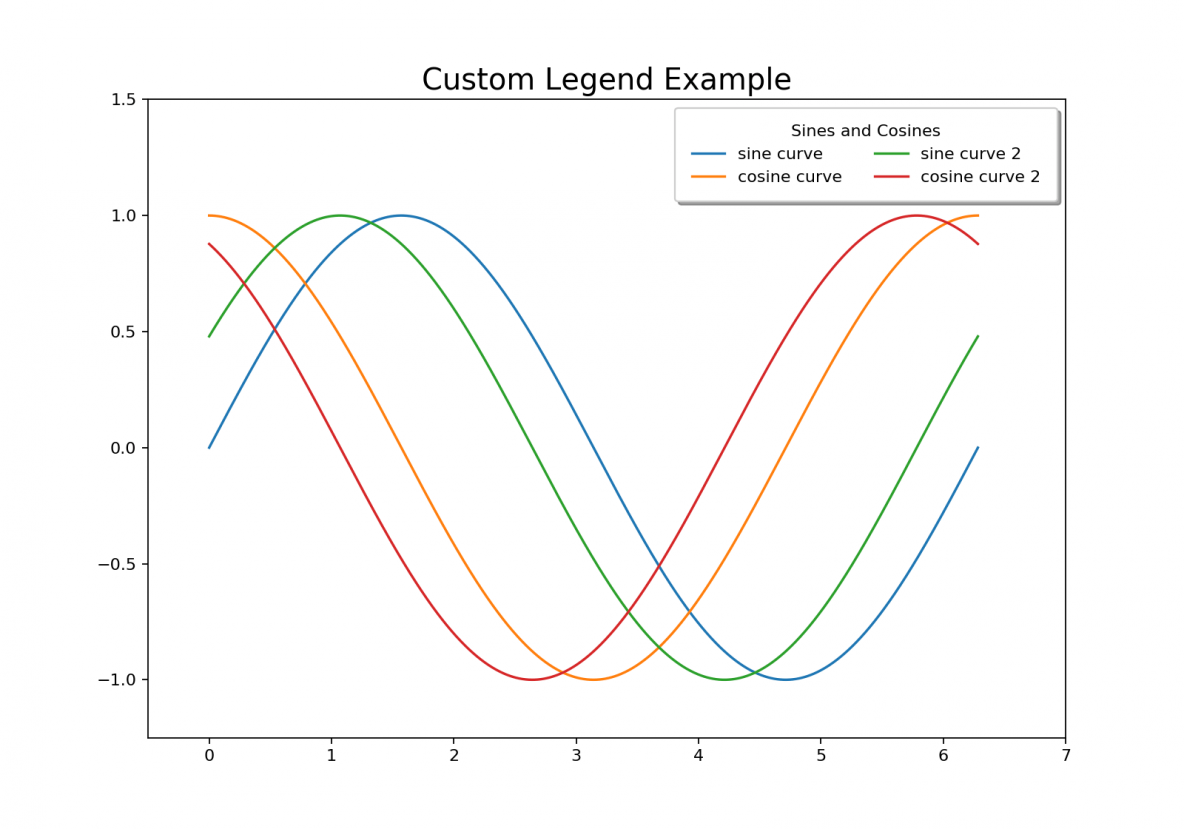

In [ ]:
let displayBuf2 = Deno.readFileSync("./cli/tests/testdata/jupyter/test.png");
Deno.jupyter.display("image/png", displayBuf2);

In [13]:
let displayBuf3 = new TextEncoder().encode("<h1>This is a heading</h1>And this is some text.");
Deno.jupyter.display("text/html", displayBuf3, {dataFormat: "string"});

This is a heading And this is some text.

#### PNG

In [17]:
await Deno.jupyter.displayPngFile("./cli/tests/testdata/jupyter/test.png");

Promise {
  <rejected> TypeError: Deno.fileRead is not a function
    at Object.displayPngFile (deno:runtime/js/40_jupyter.js:23:28)
    at <anonymous>:2:14
}

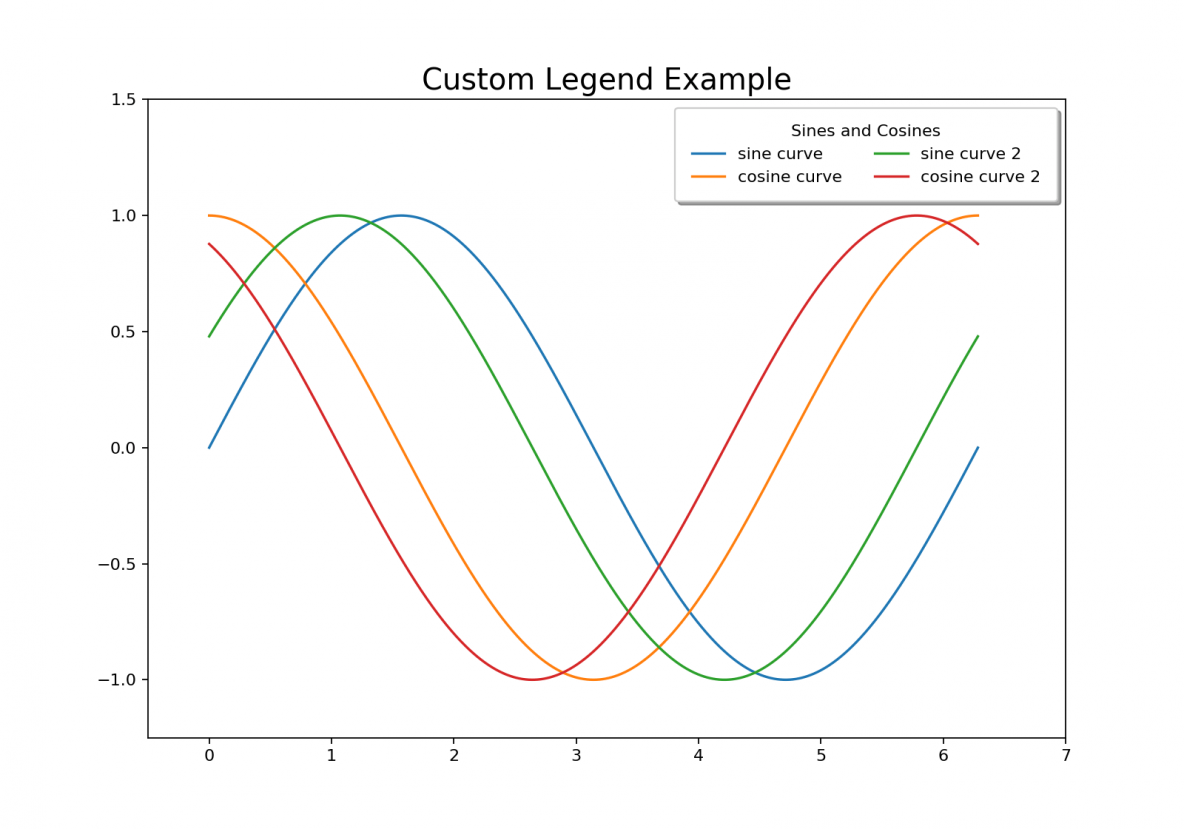

In [ ]:
let pngBuf1 = await Deno.readFile("./cli/tests/testdata/jupyter/test.png");
Deno.jupyter.displayPng(pngBuf1);

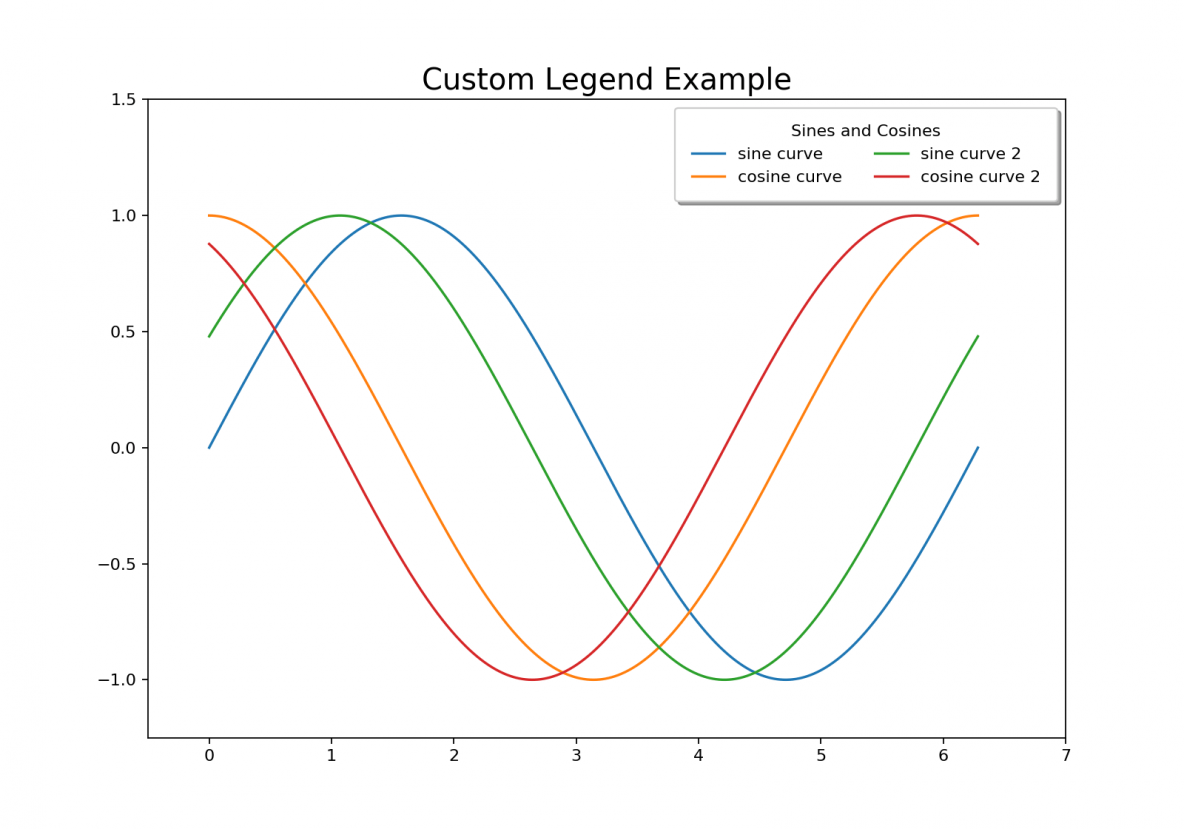

In [1]:
let pngBuf1 = await Deno.readFile("./cli/tests/testdata/jupyter/test.png");
Deno.jupyter.displayPng(pngBuf1, {width: 80, height: 60});

#### HTML

In [ ]:
await Deno.jupyter.displayHtmlFile("./cli/tests/testdata/jupyter/test.html");

Dummy Heading 
Dummy text.

In [6]:
Deno.jupyter.displayHtml("<h2>This is a test</h2>");

This is a test

### prints an error message and stack trace

In [ ]:
(function foo() {
    throw new Error("this is a test")
})()

"Error": Error: this is a test

In [14]:
Deno.readFile(1)

Promise {
  <rejected> TypeError: Error parsing args: serde_v8 error: ExpectedString
    at Object.opAsync (deno:core/01_core.js:141:28)
    at open (deno:runtime/js/40_files.js:51:28)
    at Object.readFile (deno:runtime/js/40_read_file.js:25:24)
    at <anonymous>:2:6
}

In [ ]:
import * as vl from "https://esm.sh/vega-lite-api@5";

In [3]:
const data = [{ key: "A", value: 4}, {key: "B", value:8}, {key:"C", value: 2}, {key: "D", value: 7}, {key:"E", value: 4}];

In [ ]:
data

In [5]:
const vlSpec = vl.markBar()
  .encode(
    vl.x().fieldO("key"),
    vl.y().fieldQ("value")
  )
  .height(200)
  .data(data)
  .toObject();

In [6]:
vlSpec

{
  mark: { type: "bar" },
  encoding: {
    x: { field: "key", type: "ordinal" },
    y: { field: "value", type: "quantitative" }
  },
  height: 200,
  data: {
    values: [
      { key: "A", value: 4 },
      { key: "B", value: 8 },
      { key: "C", value: 2 },
      { key: "D", value: 7 },
      { key: "E", value: 4 }
    ]
  }
}

In [7]:
Deno.jupyter.displayVegaLite(vlSpec)

In [2]:
Deno.jupyter.displayHtml('<iframe width="100%" height="740" src="https://embed.deno.com/playground/sub-relay"></iframe>');